In [28]:
%matplotlib inline
import cv2
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [29]:
IMG_DIR = '/notebooks/face-recognition-biometric-sys/augmentation-test'
IMG_SIZE = 50 #50x50 px

In [30]:
# loops through all images flips them horizontally, vertically,
# and both axes. Saves the augmented images in the original folder with 
# each flip appended to the image name
def augment_image():
    for img in tqdm(os.listdir(IMG_DIR)):
        path = os.path.join(IMG_DIR,img)
        raw_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        # copy image to display all 4 variations
        horizontal_img = raw_img.copy()
        vertical_img = raw_img.copy()
        both_img = raw_img.copy()

        # flip img horizontally, vertically,
        # and both axes with flip()
        horizontal_img = cv2.flip( raw_img, 0 )
        vertical_img = cv2.flip( raw_img, 1 )
        both_img = cv2.flip( raw_img, -1 )
        
        img_name = img.split('.')
        
        cv2.imwrite(os.path.join(IMG_DIR,img_name[0] + '.' + img_name[1] + '-horizontal.' + img_name[2]), horizontal_img)
        cv2.imwrite(os.path.join(IMG_DIR,img_name[0] + '.' + img_name[1] + '-vertical.' + img_name[2]), vertical_img)
        cv2.imwrite(os.path.join(IMG_DIR,img_name[0] + '.' + img_name[1] + '-both.' + img_name[2]), both_img)

In [31]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(IMG_DIR)):
        label = label_img(img)
        path = os.path.join(IMG_DIR,img)
        raw_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if raw_img is not None:
            img = cv2.resize(raw_img, (IMG_SIZE, IMG_SIZE))
            training_data.append([np.array(img), np.array(label)])
        
    shuffle(training_data)
    return training_data

In [32]:
augment_image()

100%|██████████| 7/7 [00:00<00:00, 53.53it/s]


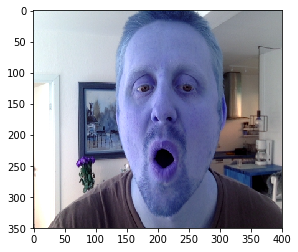

In [36]:
img = cv2.imread('/notebooks/face-recognition-biometric-sys/augmentation-test/anders-front.997-both.jpg')
img2 = cv2.imread('/notebooks/face-recognition-biometric-sys/augmentation-test/anders-open-mouth.3990.jpg')
#cv2.imshow('test', img)

plt.imshow(img)
plt.imshow(img2)

In [27]:
img = 'anders-front.997.jpg'
img_name = img.split('.')

print(img_name[0] + '.' + img_name[1] + '-both.' + img_name[2])

anders-front.997-both.jpg
